<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [13]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [14]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [15]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [16]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


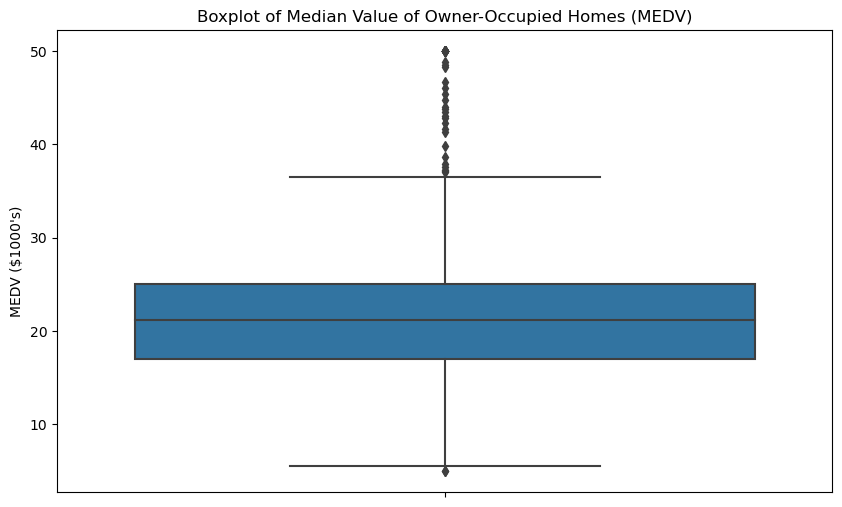

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('MEDV ($1000\'s)')
plt.show()

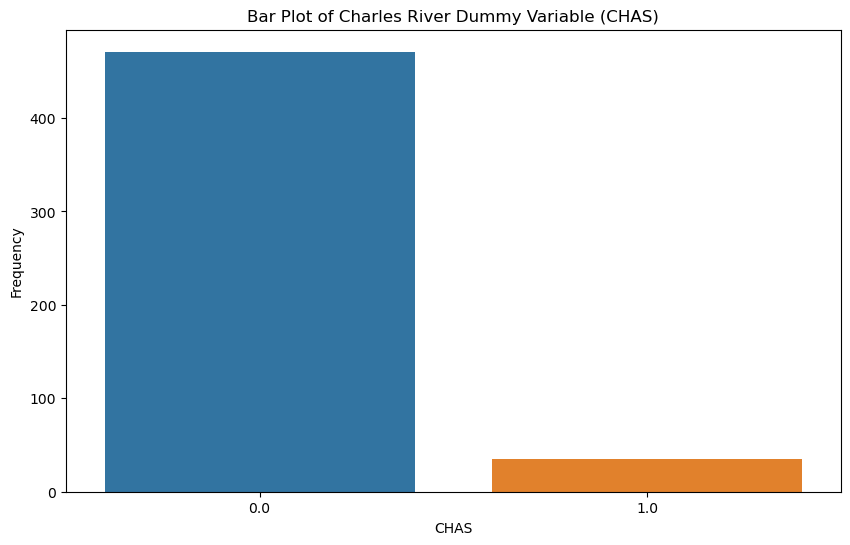

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot of Charles River Dummy Variable (CHAS)')
plt.xlabel('CHAS')
plt.ylabel('Frequency')
plt.show()


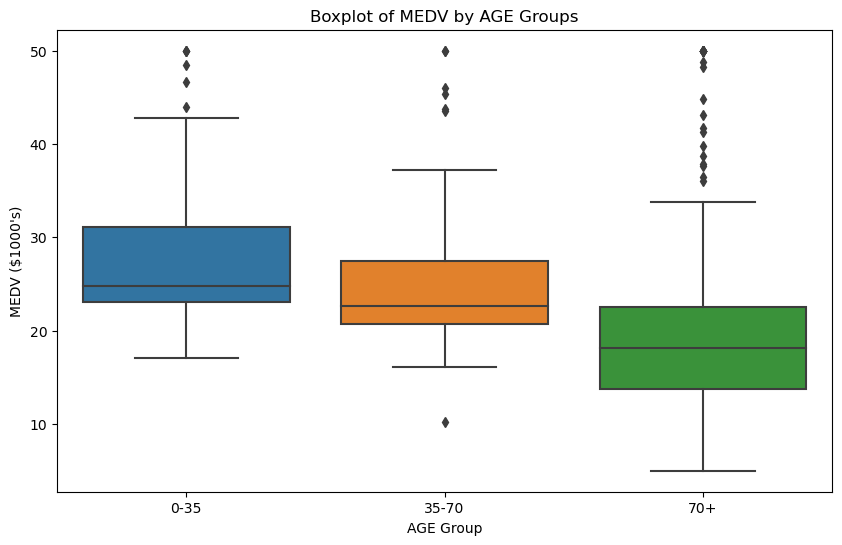

In [19]:
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['0-35', '35-70', '70+'])

plt.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['AGE_group'], y=boston_df['MEDV'])
plt.title('Boxplot of MEDV by AGE Groups')
plt.xlabel('AGE Group')
plt.ylabel('MEDV ($1000\'s)')
plt.show()


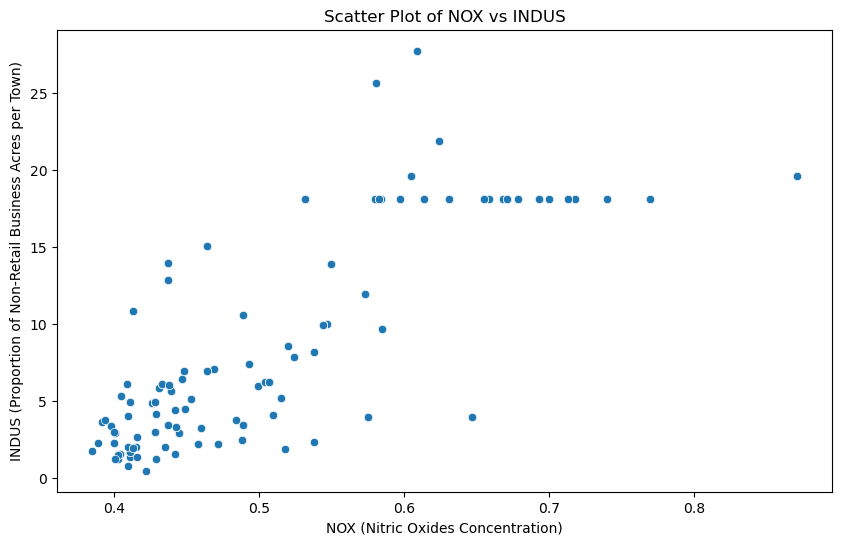

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('NOX (Nitric Oxides Concentration)')
plt.ylabel('INDUS (Proportion of Non-Retail Business Acres per Town)')
plt.show()


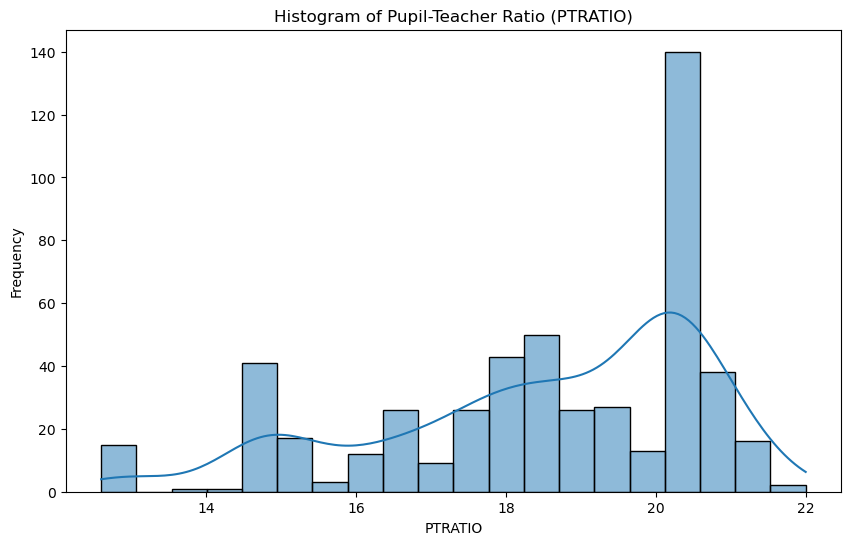

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.show()


In [22]:
from scipy.stats import ttest_ind

# Split data into two groups
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_stat, p_val = ttest_ind(group1, group2)

print(f'T-statistic: {t_stat}, P-value: {p_val}')


T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05


In [23]:
from scipy.stats import f_oneway

# Discretize AGE variable
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['0-35', '35-70', '70+'])

# Perform ANOVA
f_stat, p_val = f_oneway(
    boston_df[boston_df['AGE_group'] == '0-35']['MEDV'],
    boston_df[boston_df['AGE_group'] == '35-70']['MEDV'],
    boston_df[boston_df['AGE_group'] == '70+']['MEDV']
)

print(f'F-statistic: {f_stat}, P-value: {p_val}')


F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15


In [24]:
from scipy.stats import pearsonr

# Calculate Pearson correlation
corr, p_val = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f'Correlation coefficient: {corr}, P-value: {p_val}')


Correlation coefficient: 0.7636514469209166, P-value: 7.913361061227897e-98


In [25]:
import statsmodels.api as sm

# Define independent and dependent variables
X = boston_df['DIS']
y = boston_df['MEDV']

# Add constant to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        11:44:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0